In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df.duplicated().sum()

0

In [9]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [10]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [11]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [19]:
df.drop(columns=['RowNumber','CustomerId', 'Surname'], inplace=True)

In [20]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [22]:
# OHE using pandas
df = pd.get_dummies(df, columns=['Geography', 'Gender'],drop_first = True)

In [23]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Exited'])
y= df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size= 0.2, random_state= 1)

In [24]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [25]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [26]:
X_train.shape

(8000, 11)

In [27]:
y_train.shape

(8000,)

# scaling

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [32]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [36]:
X_train_scaled.shape

(8000, 11)

In [38]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [55]:
model = Sequential()


model.add(Dense(11, activation="relu", input_dim=11))
model.add(Dense(11, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [56]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [67]:
history = model.fit(X_train_scaled, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8672 - loss: 0.3273 - val_accuracy: 0.8519 - val_loss: 0.3393
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8659 - loss: 0.3288 - val_accuracy: 0.8512 - val_loss: 0.3396
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8608 - loss: 0.3401 - val_accuracy: 0.8531 - val_loss: 0.3393
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8656 - loss: 0.3239 - val_accuracy: 0.8512 - val_loss: 0.3408
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8729 - loss: 0.3197 - val_accuracy: 0.8562 - val_loss: 0.3392
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8585 - loss: 0.3341 - val_accuracy: 0.8519 - val_loss: 0.3402
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8671 - loss: 0.3273 - val_accuracy: 0.8512 - val_loss: 0.3400
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8580 - loss: 0.3384 - val_accuracy: 0.

In [60]:
model.layers[0].get_weights()

[array([[ 0.04171688,  0.12205762, -0.14561445, -0.05895279,  0.25540733,
          0.05187426,  0.1437064 , -0.04829302, -0.02134218,  0.06827278,
          0.00333566],
        [-0.03698116, -0.36015117, -0.25416845, -0.67889804, -0.15629984,
          0.57731175,  0.88666034,  0.25211295,  0.33235252, -0.6924609 ,
          0.29764977],
        [ 0.11413746, -0.35468575, -0.12592606, -0.15069905,  0.4541632 ,
          0.08789158,  0.01712885,  0.29723036, -0.08677321, -0.19473435,
         -0.22770095],
        [ 0.42681053,  0.25253   , -0.68072724, -0.20545411,  0.28480092,
         -0.22839989,  0.13599233, -0.17436497, -0.27595863,  0.21270499,
          0.30268532],
        [ 1.0602694 , -0.15110722, -0.44060835,  0.22193776,  0.20778793,
          0.52311736,  0.14355046,  0.24358273, -0.902869  , -0.17375211,
          1.1905868 ],
        [-0.13151571,  0.08237486,  0.35579935, -0.23992239,  0.15812768,
          0.04847725,  0.25589266,  0.01297577, -0.04101264,  0.2391631

In [61]:
model.layers[1].get_weights()

[array([[ 0.03492351, -0.5852877 , -0.2825171 , -0.5972665 ,  0.12211236,
          0.833663  ,  0.11391777, -0.26282662, -0.01784442, -0.6586689 ,
         -0.36503384],
        [ 0.29659602,  0.56347376, -0.6584096 ,  0.03985295,  0.23374976,
         -0.46338046, -0.16164006,  0.41888055,  0.56477636, -0.39087033,
          0.3285576 ],
        [ 0.27911448,  0.37226316,  0.46067187, -0.6043879 , -0.4398578 ,
         -0.02347625,  0.3854197 ,  0.04555475,  0.22731178, -0.20025758,
         -0.7750181 ],
        [ 0.39782667, -0.14788467, -0.2890509 , -0.05696456,  0.14677203,
          0.2290273 ,  0.8056404 ,  0.02631759,  0.23848183,  0.5657462 ,
          0.5097134 ],
        [ 0.06445568,  0.11050764, -0.08974711,  0.54580843,  0.5055613 ,
          0.1605143 ,  0.3444753 ,  0.52632785,  0.2991269 , -0.23449692,
         -0.336531  ],
        [ 0.41888034, -0.33554453, -0.3089403 ,  0.07392048, -0.47900268,
         -0.01206299, -0.32395533,  0.09722155, -0.166062  ,  0.2848927

In [62]:
model.layers[2].get_weights()

[array([[-0.62683445],
        [ 0.9457041 ],
        [ 0.88140523],
        [ 0.46016034],
        [ 1.0409598 ],
        [ 0.88713104],
        [-0.34570318],
        [-0.64270586],
        [-0.8199055 ],
        [-0.6945664 ],
        [ 1.2507782 ]], dtype=float32),
 array([-0.25957742], dtype=float32)]

In [63]:
model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.03534436],
       [0.08848082],
       [0.04705044],
       ...,
       [0.01411887],
       [0.04910276],
       [0.38208592]], dtype=float32)

In [64]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [65]:
y_pred = np.where(y_log>0.5, 1,0)

In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.867

In [68]:
import matplotlib.pyplot as plt

In [70]:
history.history

{'accuracy': [0.8637499809265137,
  0.8654687404632568,
  0.8639062643051147,
  0.8628125190734863,
  0.8645312786102295,
  0.8645312786102295,
  0.8650000095367432,
  0.8643749952316284,
  0.8639062643051147,
  0.8639062643051147,
  0.8617187738418579,
  0.8654687404632568,
  0.8662499785423279,
  0.8645312786102295,
  0.8643749952316284,
  0.8656250238418579,
  0.8645312786102295,
  0.8662499785423279,
  0.8660937547683716,
  0.8656250238418579],
 'loss': [0.33360177278518677,
  0.3325997292995453,
  0.3321223556995392,
  0.3317662179470062,
  0.3313038945198059,
  0.3313651978969574,
  0.331198126077652,
  0.3307116627693176,
  0.3302868902683258,
  0.3303090035915375,
  0.3298708200454712,
  0.32987332344055176,
  0.3289216160774231,
  0.32899773120880127,
  0.32974711060523987,
  0.32837095856666565,
  0.328378289937973,
  0.3278293311595917,
  0.32810506224632263,
  0.32761627435684204],
 'val_accuracy': [0.8518750071525574,
  0.8512499928474426,
  0.8531249761581421,
  0.8512499

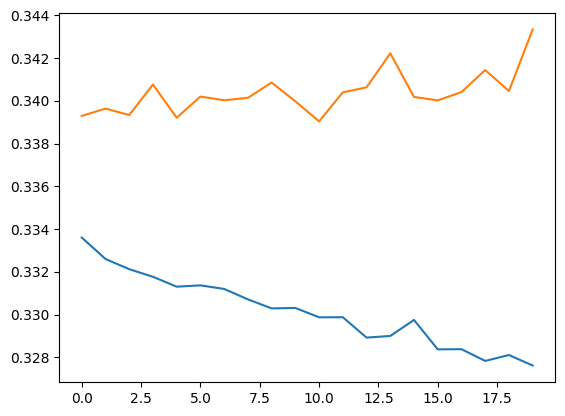

In [72]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

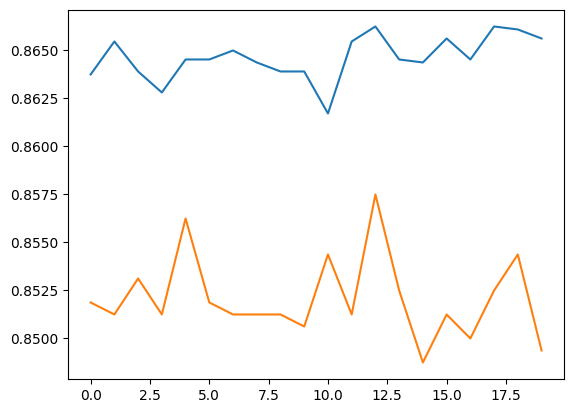

In [73]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])